In [2]:
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [3]:
infile = 'sample_data_aatest.csv'

In [4]:
df = pd.read_csv(infile)

In [5]:
df.head(5)

,user,expid,click,like,age,gender,friend_cnt,sns_like_cnt,sns_comment_cnt
0,13969,1,0,0,18,2,60,16,42
1,60948,0,0,0,20,2,712,218,257
2,9987,0,1,0,32,2,378,39,187
3,93677,1,0,0,36,2,136,51,67
4,43465,0,0,0,25,2,555,238,220


In [5]:
df.shape

(100000, 9)

### Show Distributions

<AxesSubplot:ylabel='Frequency'>

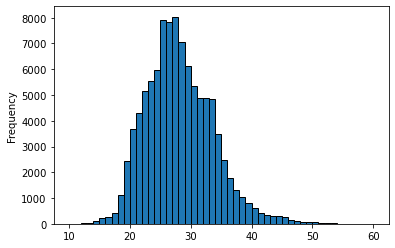

In [6]:
# age distribution
df.age.plot.hist(bins = 50, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

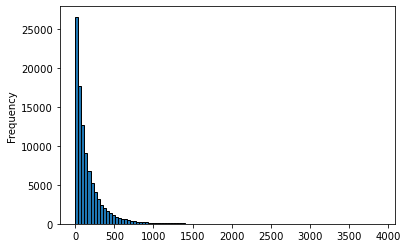

In [7]:
# sns_comment_cnt
df.sns_comment_cnt.plot.hist(bins = 100, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

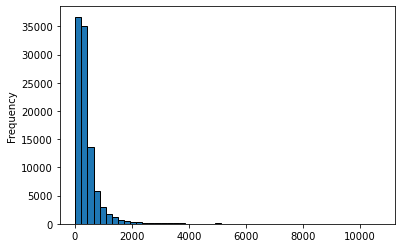

In [8]:
# friend_cnt
df.friend_cnt.plot.hist(bins = 50, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

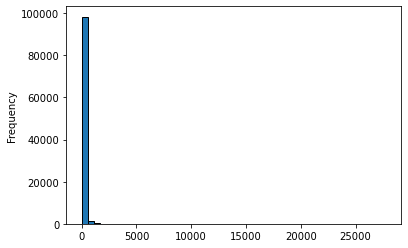

In [9]:
# sns_like_cnt
df.sns_like_cnt.plot.hist(bins = 50, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

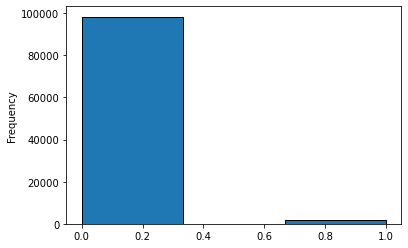

In [10]:
# like
df.like.plot.hist(bins = 3, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

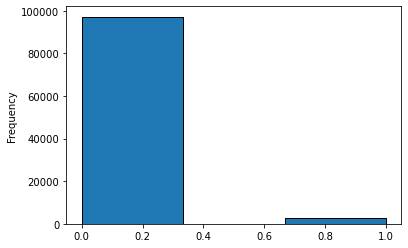

In [11]:
# click
df.click.plot.hist(bins = 3, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

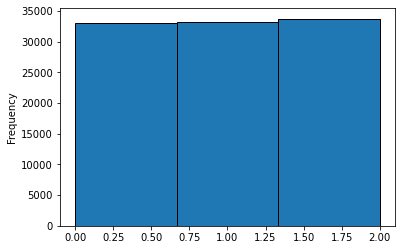

In [12]:
# expid
df.expid.plot.hist(bins = 3, edgecolor = 'black')

In [15]:
df[df['expid'] == 2].describe()

,user,expid,click,like,age,gender,friend_cnt,sns_like_cnt,sns_comment_cnt
count,33729.000000,33729.0,33729.000000,33729.000000,33729.000000,33729.000000,33729.000000,33729.000000,33729.000000
mean,50089.265528,2.0,0.028729,0.015595,27.644164,1.554953,413.899285,89.391414,165.654007
std,28834.694726,0.0,0.167046,0.123904,5.609647,0.496978,463.987295,203.188061,216.061155
min,6.000000,2.0,0.000000,0.000000,10.000000,1.000000,13.000000,0.000000,0.000000
25%,25234.000000,2.0,0.000000,0.000000,24.000000,1.000000,179.000000,15.000000,36.000000
50%,49868.000000,2.0,0.000000,0.000000,27.000000,2.000000,282.000000,41.000000,94.000000
75%,75059.000000,2.0,0.000000,0.000000,31.000000,2.000000,468.000000,97.000000,211.000000
max,100000.000000,2.0,1.000000,1.000000,60.000000,2.000000,10680.000000,11376.000000,3184.000000


### Randomization Checks

In [16]:
def multi_cm(x):
    x0 = df[df['expid'] == 0][x]
    x1 = df[df['expid'] == 1][x]
    x2 = df[df['expid'] == 2][x]
    cm01 = sms.CompareMeans(sms.DescrStatsW(x0), sms.DescrStatsW(x1))
    cm02 = sms.CompareMeans(sms.DescrStatsW(x0), sms.DescrStatsW(x2))
    cm12 = sms.CompareMeans(sms.DescrStatsW(x1), sms.DescrStatsW(x2))
    print(x)
    print(cm01.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled'))
    print(cm02.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')) 
    print(cm12.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled'))
    return
for feature in df.columns[2:]:
    multi_cm(feature)

click
(-0.0019913691840344316, 0.003049225038913554)
(-0.0028053497158239053, 0.002253017947726143)
(-0.0033178318488350247, 0.0017076442258581403)
like
(-0.0029924860957550696, 0.0009071930722444159)
(-0.0013409002840902857, 0.0024521956034138656)
(-0.00032455477532386794, 0.0035211431181581014)
age
(-0.08509572589894755, 0.08304880096864277)
(-0.06973486633165578, 0.0993880428141037)
(-0.06835116276525886, 0.10005126417801156)
gender
(-0.005184227577428383, 0.009953215980546284)
(-0.006952113328526245, 0.0081308674117469)
(-0.009323254145376499, 0.005733019825479253)
friend_cnt
(-10.723110083918368, 3.7505764307351903)
(-4.060584867921881, 10.07766144176174)
(-0.6738545011246799, 13.663464728147716)
sns_like_cnt
(-2.6188875655353523, 4.434424205635317)
(-2.9907063350752945, 3.5377979002846085)
(-3.97097352732027, 2.70252845242962)
sns_comment_cnt
(-4.461183543114147, 2.1759428953387223)
(-4.08045593219401, 2.459067109920962)
(-2.97728262942097, 3.641134454923347)


### Estimate Baseline Metrics

In [17]:
like0=np.mean(df.like)
var_like0=np.var(df.like)

In [18]:
click0=np.mean(df.click)
var_click0=np.var(df.click)

In [19]:
sns_like_cnt0=np.mean(df.sns_like_cnt)
var_sns_like_cnt0=np.var(df.sns_like_cnt)

In [20]:
sns_comment_cnt0=np.mean(df.sns_comment_cnt)
var_sns_comment_cnt0=np.var(df.sns_comment_cnt)

In [21]:
print((like0,var_like0),(click0,var_click0),(sns_like_cnt0,var_sns_like_cnt0),(sns_comment_cnt0,var_sns_comment_cnt0))

(0.01631, 0.016043983900039627) (0.02837, 0.027565143099944938) (89.27069, 49470.08475692851) (165.49689, 47219.50135032698)


### Power Analysis 

#### click

In [22]:
practical_lift = 0.1
delta_click = practical_lift*click0
print(delta_click)

0.002837


Sample Size

In [28]:
size_click = 16*var_click0/(delta_click**2)

In [29]:
print(size_click)

54797.6031017587


In [30]:
delta_like = (practical_lift)*like0
print(delta_like)

0.0016310000000000003


In [31]:
size_like = 16*var_like0/(delta_like**2)

In [32]:
print(size_like)

96499.32556737504
